In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import xgboost as xgb

# EDA

In [2]:
df = pd.read_csv("../data/raw/House_Rent_Dataset.csv")
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.describe(include='all')

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
count,4746,4746.000000,4.746000e+03,4746.000000,4746,4746,4746,4746,4746,4746,4746.000000,4746
unique,81,NaN,NaN,NaN,480,3,2235,6,3,3,NaN,3
top,2022-07-06,NaN,NaN,NaN,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,NaN,Contact Owner
freq,311,NaN,NaN,NaN,379,2446,37,972,2251,3444,NaN,3216
mean,NaN,2.083860,3.499345e+04,967.490729,NaN,NaN,NaN,NaN,NaN,NaN,1.965866,NaN
std,NaN,0.832256,7.810641e+04,634.202328,NaN,NaN,NaN,NaN,NaN,NaN,0.884532,NaN
min,NaN,1.000000,1.200000e+03,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,2.000000,1.000000e+04,550.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,2.000000,1.600000e+04,850.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
75%,NaN,3.000000,3.300000e+04,1200.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
df.shape

(4746, 12)

In [7]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [8]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

## Univariate Analysis

### Posted On

In [9]:
print('Unique dates:', df['Posted On'].nunique())
print('Date range:', df['Posted On'].min(), 'to', df['Posted On'].max())
df['Posted On'] = pd.to_datetime(df['Posted On'])

Unique dates: 81
Date range: 2022-04-13 to 2022-07-11


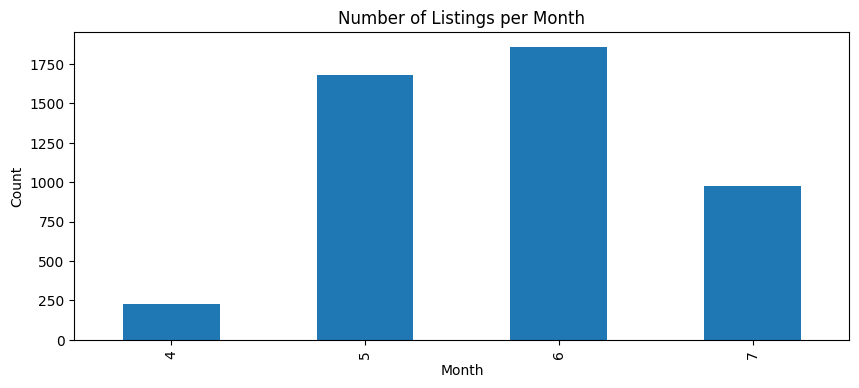

In [10]:
plt.figure(figsize=(10, 4))
df['Posted On'] = pd.to_datetime(df['Posted On'])
df['Posted On'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Listings per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

### BHK

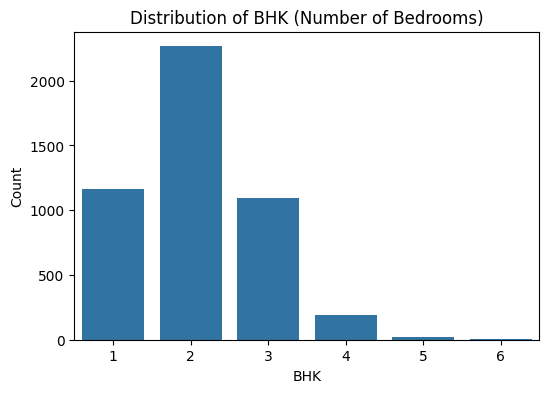

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='BHK', data=df)
plt.title('Distribution of BHK (Number of Bedrooms)')
plt.xlabel('BHK')
plt.ylabel('Count')
plt.show()

In [12]:
df['BHK'].value_counts()

BHK
2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: count, dtype: int64

- The most common configuration is 2 BHK, followed by 1 BHK and 3 BHK.
- There are no unusual or extreme values; all entries are within expected residential ranges.

### Rent

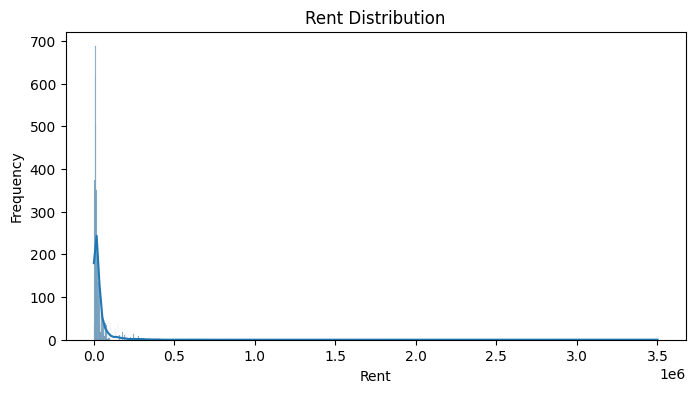

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Rent'], kde=True)
plt.title('Rent Distribution')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()

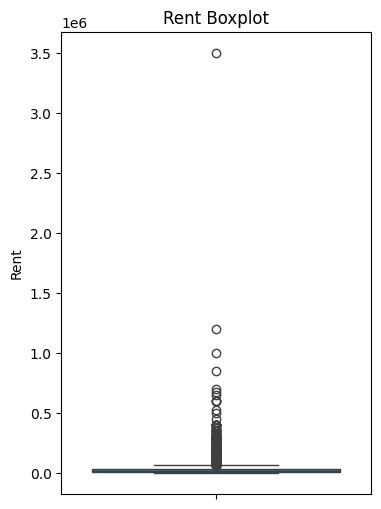

In [14]:
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['Rent'])
plt.title('Rent Boxplot')
plt.show()

In [15]:
print("Mean House Rent:", round(df["Rent"].mean()))
print("Median House Rent:", round(df["Rent"].median()))
print("Highest House Rent:", round(df["Rent"].max()))
print("Lowest House Rent:", round(df["Rent"].min()))

Mean House Rent: 34993
Median House Rent: 16000
Highest House Rent: 3500000
Lowest House Rent: 1200


In [16]:
df["Rent"].sort_values(ascending = False)[:5]

1837    3500000
1001    1200000
827     1000000
1329     850000
1459     700000
Name: Rent, dtype: int64

In [17]:
df["Rent"].sort_values()[:5]

4076    1200
285     1500
471     1800
2475    2000
146     2200
Name: Rent, dtype: int64

- Rent values are right-skewed, with most properties in the lower to mid-range and a few outliers at the high end.
- The presence of high-rent outliers suggests some luxury or premium properties.
- The median rent is noticeably lower than the maximum, highlighting the skewness.

### Size

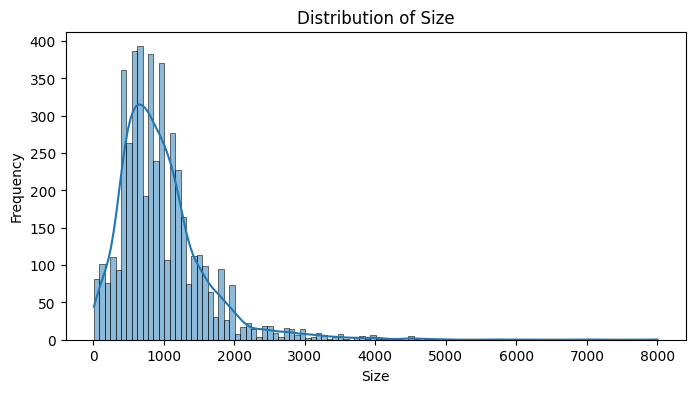

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Size'], kde=True)
plt.title('Distribution of Size')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

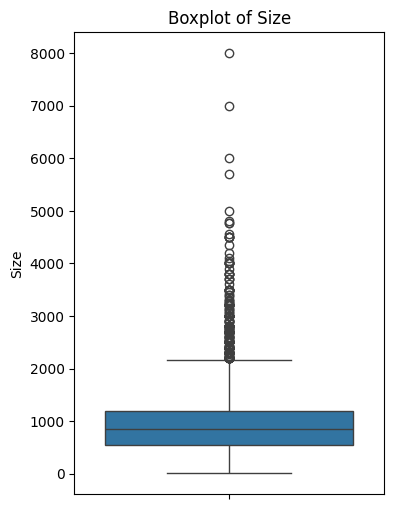

In [19]:
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['Size'])
plt.title('Boxplot of Size')
plt.show()

- Most properties fall within a moderate size range, but there are a few much larger outliers.
- The size distribution is also right-skewed.
- Boxplot analysis reveals potential outliers that may represent atypical or high-end properties.

### Floor

In [20]:
df['Floor'].value_counts().head(10)

Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
3 out of 4         239
Ground out of 3    209
1 out of 4         200
Ground out of 1    195
1 out of 1         134
Name: count, dtype: int64

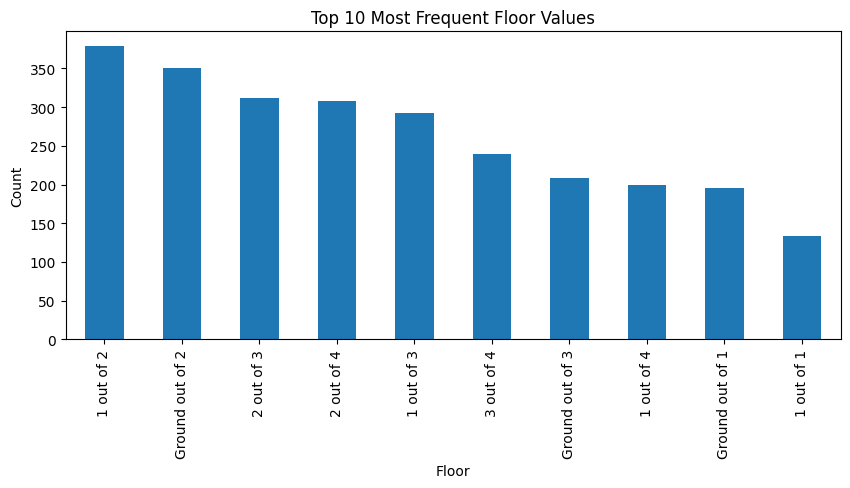

In [21]:
plt.figure(figsize=(10, 4))
df['Floor'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent Floor Values')
plt.xlabel('Floor')
plt.ylabel('Count')
plt.show()

- Floor information is presented as a combination of current floor and total floors (e.g., "1 out of 3").
- Ground and 1st floors are the most frequently listed.

### Area type

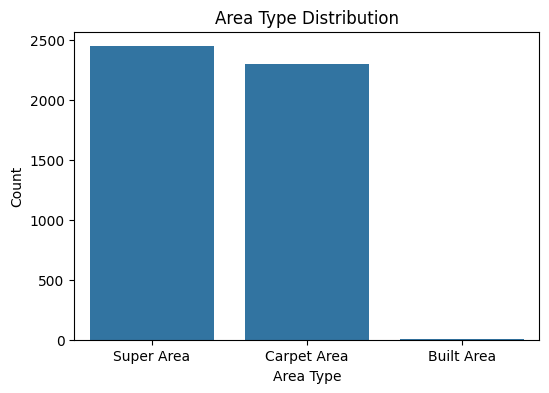

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Area Type', data=df)
plt.title('Area Type Distribution')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.show()

In [23]:
df['Area Type'].value_counts()

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64

- The majority of examples are classified as 'Super Area', with 'Carpet Area' and 'Built Area' being less frequent.

### Area Locality

In [24]:
print('\nNumber of unique Area Localities:', df['Area Locality'].nunique())
print('Most common Area Localities:')
print(df['Area Locality'].value_counts().head(10))


Number of unique Area Localities: 2235
Most common Area Localities:
Area Locality
Bandra West        37
Gachibowli         29
Electronic City    24
Miyapur, NH 9      22
Velachery          22
Madipakkam         20
Chembur            19
Laxmi Nagar        19
K R Puram          19
Kondapur           18
Name: count, dtype: int64


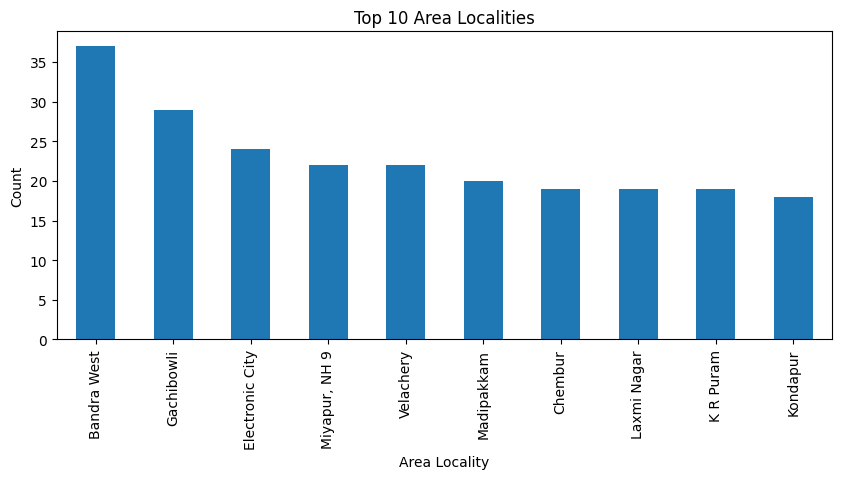

In [25]:
plt.figure(figsize=(10, 4))
df['Area Locality'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Area Localities')
plt.xlabel('Area Locality')
plt.ylabel('Count')
plt.show()

- There are many unique localities, with a few localities appearing much more frequently.
- The top localities account for a significant number of examples, while most localities are sparsely represented.

### City

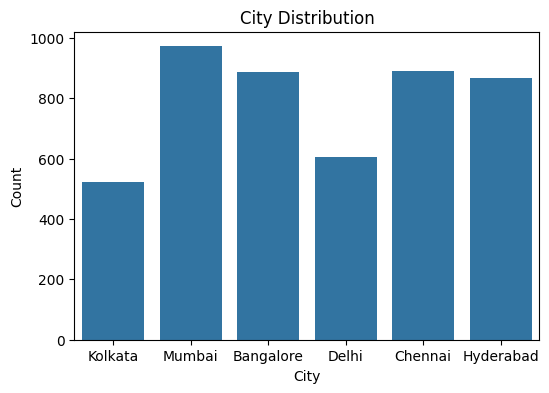

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(x='City', data=df)
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

In [27]:
print(df['City'].value_counts())

City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64


### Furnishing Status

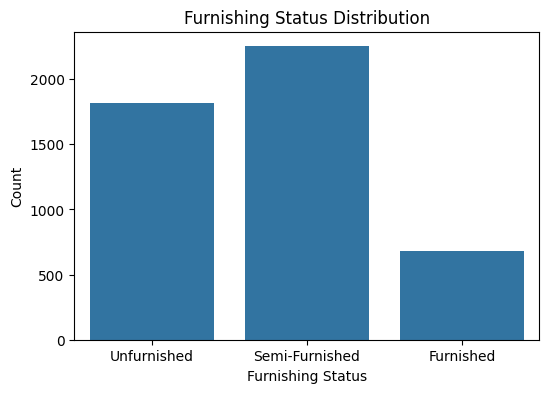

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Furnishing Status', data=df)
plt.title('Furnishing Status Distribution')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.show()

In [29]:
df['Furnishing Status'].value_counts()

Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64

- 'Unfurnished' is the most common furnishing status, followed by 'Semi-Furnished' and 'Furnished'.

### Tenant Preferred

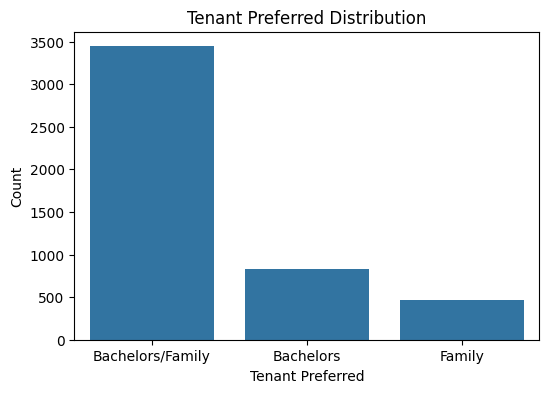

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Tenant Preferred', data=df)
plt.title('Tenant Preferred Distribution')
plt.xlabel('Tenant Preferred')
plt.ylabel('Count')
plt.show()

In [31]:
df['Tenant Preferred'].value_counts()

Tenant Preferred
Bachelors/Family    3444
Bachelors            830
Family               472
Name: count, dtype: int64

### Bathroom

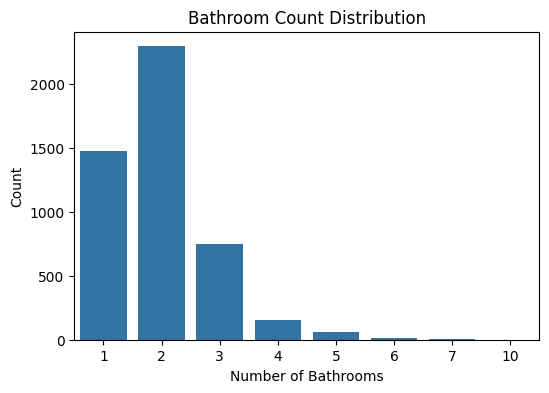

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Bathroom', data=df)
plt.title('Bathroom Count Distribution')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

In [33]:
df['Bathroom'].value_counts()

Bathroom
2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: count, dtype: int64

- The majority of properties offer 1 or 2 bathrooms.
- No extreme or invalid values are present.

### Point of Contact

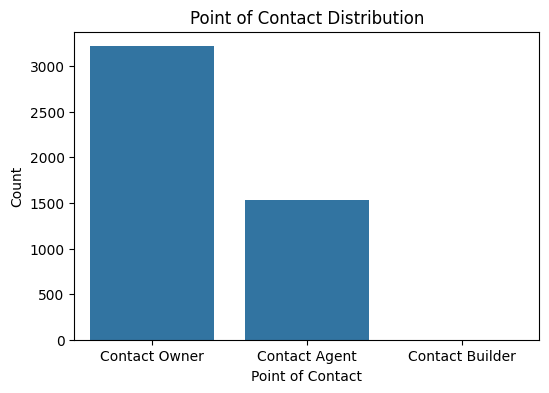

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Point of Contact', data=df)
plt.title('Point of Contact Distribution')
plt.xlabel('Point of Contact')
plt.ylabel('Count')
plt.show()

In [35]:
df['Point of Contact'].value_counts()

Point of Contact
Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: count, dtype: int64

- Most examples are posted by owners, followed by agents, and a few by builders.

## Multivariate Analysis

### Correlation heatmap (Numerical features)

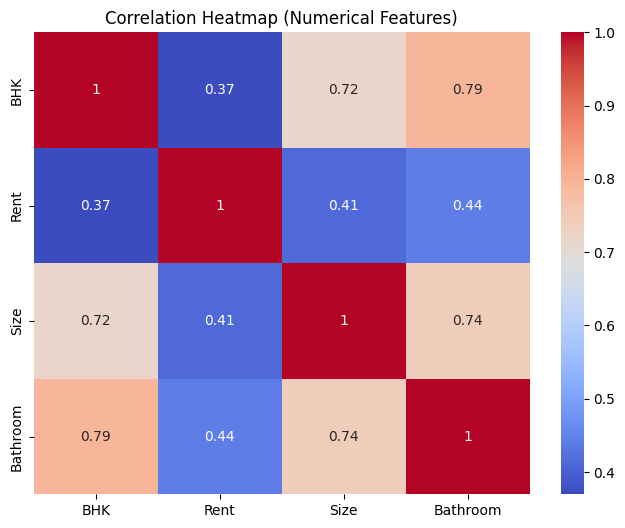

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

### Pairplot for numerical variables

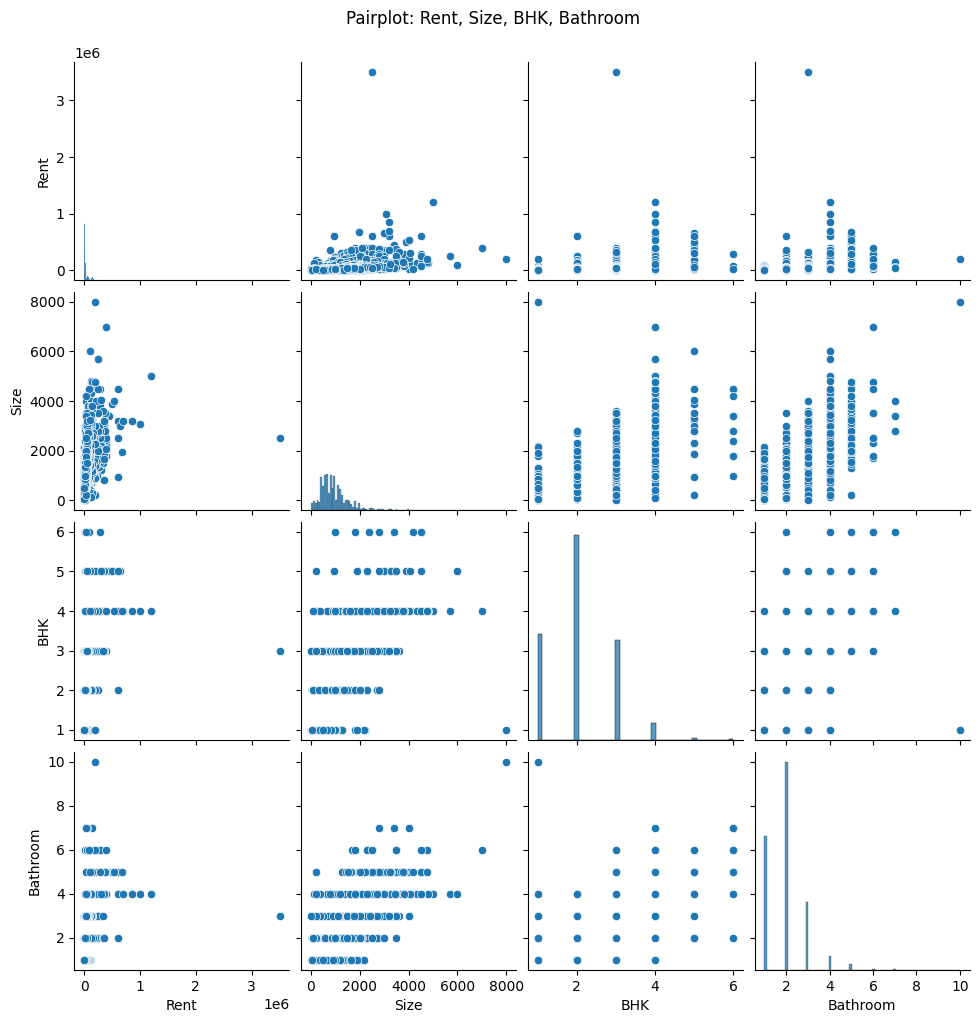

In [37]:
sns.pairplot(df[['Rent', 'Size', 'BHK', 'Bathroom']])
plt.suptitle('Pairplot: Rent, Size, BHK, Bathroom', y=1.02)
plt.show()

### Barplot: Rent vs. BHK, colored by Furnishing Status

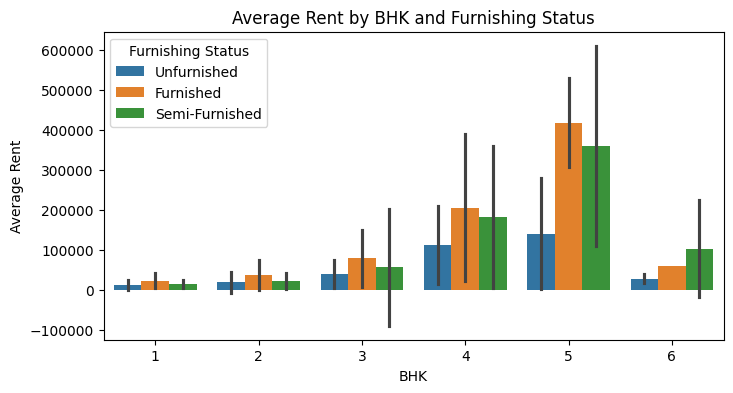

In [38]:
plt.figure(figsize=(8, 4))
sns.barplot(x='BHK', y='Rent', hue='Furnishing Status', data=df, errorbar='sd')
plt.title('Average Rent by BHK and Furnishing Status')
plt.ylabel('Average Rent')
plt.show()

### Barplot: Rent vs. Area Type

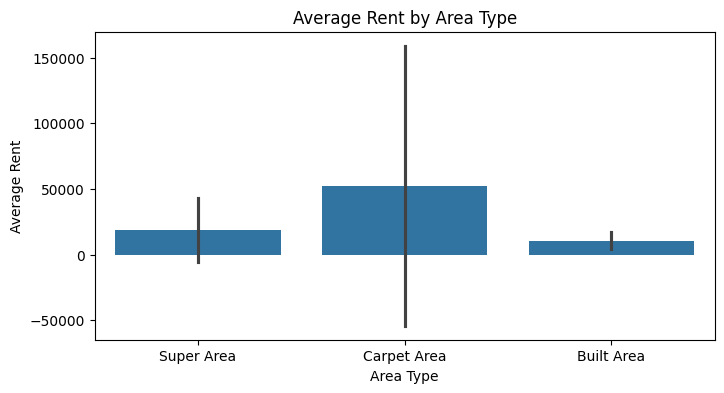

In [39]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Area Type', y='Rent', data=df, errorbar='sd')
plt.title('Average Rent by Area Type')
plt.ylabel('Average Rent')
plt.show()

### Rent distribution by Tenant Preferred

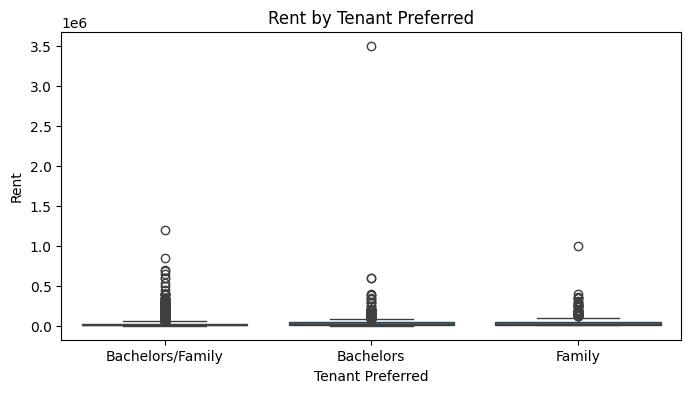

In [40]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Tenant Preferred', y='Rent', data=df)
plt.title('Rent by Tenant Preferred')
plt.show()

### Scatterplot: Size vs. Rent, colored by BHK

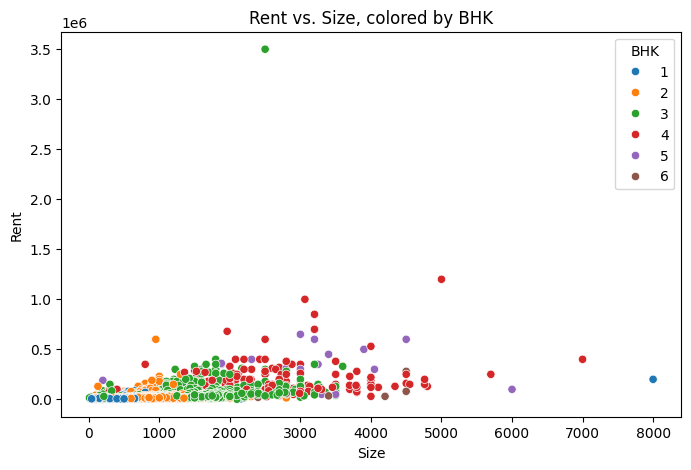

In [41]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Size', y='Rent', hue='BHK', data=df, palette='tab10')
plt.title('Rent vs. Size, colored by BHK')
plt.show()

### Relationship between Floor (extract floor number) and Rent

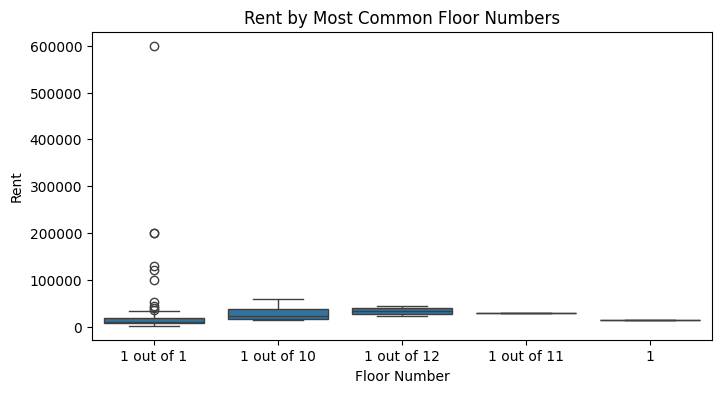

In [42]:
top_floors = df['Floor'].value_counts().sort_index().head(5).index
plt.figure(figsize=(8,4))
sns.boxplot(x='Floor', y='Rent', data=df[df['Floor'].isin(top_floors)])
plt.title('Rent by Most Common Floor Numbers')
plt.xlabel('Floor Number')
plt.ylabel('Rent')
plt.show()

### Average rent for top 10 area localities

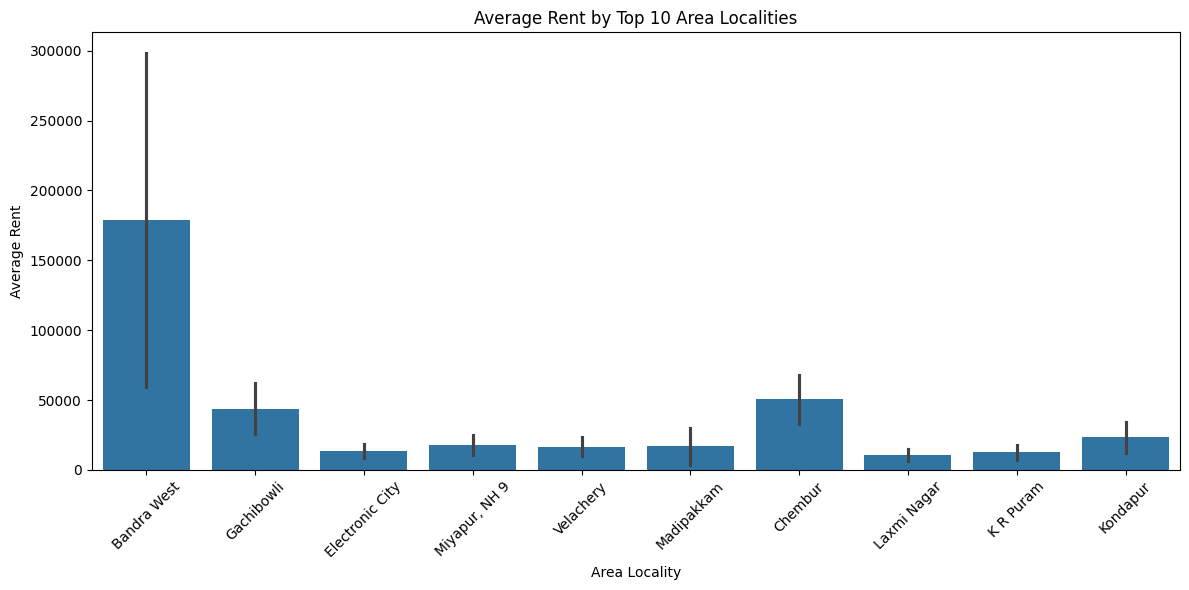

In [43]:
top_localities = df['Area Locality'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Area Locality',
    y='Rent',
    data=df[df['Area Locality'].isin(top_localities)],
    estimator='mean',
    errorbar='sd',
    order=top_localities
)
plt.title('Average Rent by Top 10 Area Localities')
plt.xlabel('Area Locality')
plt.ylabel('Average Rent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Cross-tabulation: Furnishing Status and Tenant Preferred

In [44]:
cross_tab = pd.crosstab(df['Furnishing Status'], df['Tenant Preferred'])
print("Crosstab: Furnishing Status vs. Tenant Preferred")
print(cross_tab)

Crosstab: Furnishing Status vs. Tenant Preferred
Tenant Preferred   Bachelors  Bachelors/Family  Family
Furnishing Status                                     
Furnished                 97               508      75
Semi-Furnished           324              1675     252
Unfurnished              409              1261     145


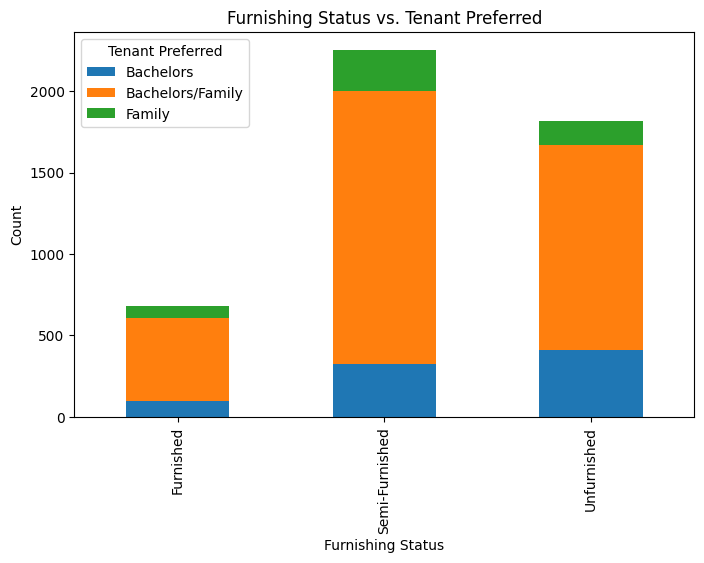

In [45]:
cross_tab.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Furnishing Status vs. Tenant Preferred')
plt.ylabel('Count')
plt.show()

#### 1. Correlation Between Numerical Variables
- There is a strong positive correlation between property Size and Rent, indicating that larger properties generally command higher rents.
- BHK (number of bedrooms) and Bathroom count are also moderately correlated with both Size and Rent, which is expected as properties with more bedrooms and bathrooms tend to be larger and more expensive.

#### 2. Rent vs. Area Type
- Properties with 'Super Area' type generally have higher average rents compared to those with 'Carpet Area' or 'Built Area'.
- The distribution of rent is wider for 'Super Area', suggesting more variability in property size or quality within this category.

#### 3. Rent vs. BHK and Furnishing Status
- For each BHK category, 'Furnished' properties tend to have higher rents than 'Unfurnished' or 'Semi-Furnished' ones.
- The difference in rent based on furnishing status is more pronounced in properties with a higher number of bedrooms.

#### 4. Rent vs. Tenant Preferred
- Properties open to both bachelors and families have a wide range of rents, suggesting less restriction on rent price.
- Listings restricted to only families or only bachelors show somewhat lower rent on average.

#### 5. Rent vs. Bathroom
- Properties with more bathrooms generally have higher rents, further showing that additional amenities are associated with higher prices.
- The rent distribution becomes wider as the number of bathrooms increases, likely reflecting luxury or high-end properties.

#### 6. Rent vs. Floor Number
- There is no strong or clear trend between floor number and rent after grouping floors; however, very high floors and ground floors sometimes show slightly different rent patterns, possibly due to specific preferences in the local market.

#### 7. Rent vs. Area Locality
- The top localities have noticeably higher average rents, suggesting that location is a key driver of price. 
- Some localities are clear outliers in terms of rent, reflecting premium neighborhoods.

#### 8. Categorical Variable Interactions
- Cross-tabulation between 'Furnishing Status' and 'Tenant Preferred' shows that most fully furnished listings are open to both bachelors and families.
- Owner-listed properties tend to be more open to all tenant types, while agent or builder listings sometimes target specific groups.

# Dataset Transformation

In [46]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [47]:
def parse_floor(floor_str):
    if pd.isnull(floor_str):
        return np.nan, np.nan
    floor_str = floor_str.strip()
    if "out of" in floor_str:
        part, total = floor_str.split("out of")
        part = part.strip()
        total = total.strip()
        if part == "Ground":
            floor_num = 0
        elif part == "Upper Basement":
            floor_num = -1
        elif part == "Lower Basement":
            floor_num = -2
        elif part.isdigit():
            floor_num = int(part)
        else:
            floor_num = np.nan
        try:
            total_floors = int(total)
        except:
            total_floors = np.nan
        return floor_num, total_floors
    elif floor_str.isdigit():
        return int(floor_str), np.nan
    elif floor_str == "Ground":
        return 0, np.nan
    else:
        return np.nan, np.nan

def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_true = y_test.values

    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2: {r2:.2f}")
    return y_true, y_pred

def plot_actual_vs_predicted(y_true, y_pred, n_points=1000):
    plt.figure(figsize=(8,8))
    plt.scatter(y_true[:n_points], y_pred[:n_points], alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label='Ideal')
    plt.xlabel('Actual Rent')
    plt.ylabel('Predicted Rent')
    plt.title('Actual vs Predicted Rent')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_feature_importance(model, feature_names, top_n=20):
    importances = model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("\nTop {} feature importances:".format(top_n))
    print(importance_df.head(top_n))

    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n][::-1], importance_df['Importance'][:top_n][::-1], color='skyblue')
    plt.xlabel("Importance")
    plt.title(f"Top {top_n} Feature Importances")
    plt.tight_layout()
    plt.show()

    return importance_df

This function takes a string describing the floor of an apartment (for example, `"3 out of 10"`, `"Ground out of 5"`, `"Upper Basement out of 4"`, `"5"`, or `"Ground"`) and extracts two numeric values:

1. **The specific floor number** (e.g., 3 for the third floor, 0 for ground, -1 for upper basement, -2 for lower basement)
2. **The total number of floors** in the building (if available)

In [49]:
df[['Current_Floor', 'Total_Floors']] = df['Floor'].apply(lambda x: pd.Series(parse_floor(x)))
df['Current_Floor'] = df['Current_Floor'].fillna(df['Current_Floor'].median()).astype(int)
df['Total_Floors'] = df['Total_Floors'].fillna(df['Total_Floors'].median()).astype(int)
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Current_Floor,Total_Floors
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34


In [51]:
df['Posted On'] = pd.to_datetime(df['Posted On'], errors='coerce')
df['Month'] = df['Posted On'].dt.month
df['Day'] = df['Posted On'].dt.day
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Current_Floor,Total_Floors,Month,Day
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2,5,18
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,5,13
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,5,16
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,7,4
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5,5,18
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4,5,15
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5,7,10
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34,7,6


In [52]:
df = df[df['Point of Contact'] != 'Contact Builder']

In [53]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Current_Floor,Total_Floors,Month,Day
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2,5,18
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,5,13
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,5,16
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,7,4
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5,5,18
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4,5,15
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5,7,10
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34,7,6


In [54]:
rent_upper = df['Rent'].quantile(0.99)
size_upper = df['Size'].quantile(0.99)
df = df[(df['Rent'] <= rent_upper) & (df['Size'] <= size_upper)]

We remove extreme outliers in both rent and size by keeping only data below the 99th percentile for each. This helps stabilize the model and prevents rare, extreme values from skewing the results.

In [55]:
y = df['Rent']
feature_cols = [
    'BHK', 'Size', 'Current_Floor', 'Total_Floors', 'Day', 'Month',
    'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Area Type', 'Bathroom'
]

X = df[feature_cols]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
top_areas = X_train['Area Locality'].value_counts().nlargest(20).index
X_train['Area_Locality_Top'] = X_train['Area Locality'].apply(lambda x: x if x in top_areas else 'Other')
X_test['Area_Locality_Top'] = X_test['Area Locality'].apply(lambda x: x if x in top_areas else 'Other')

X_train = X_train.drop(columns=['Area Locality'])
X_test = X_test.drop(columns=['Area Locality'])

Only the 20 most common localities are kept as separate categories; all others are grouped as "Other". This reduces the dimensionality of the data and prevents overfitting due to rare categories.

In [58]:
X_train['log_Size'] = np.log1p(X_train['Size'])
X_test['log_Size'] = np.log1p(X_test['Size'])
X_train = X_train.drop(columns=['Size'])
X_test = X_test.drop(columns=['Size'])

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [59]:
X_train['Bath_per_BHK'] = X_train['Bathroom'] / X_train['BHK']
X_test['Bath_per_BHK'] = X_test['Bathroom'] / X_test['BHK']

X_train['Size_per_BHK'] = np.log1p(X_train['log_Size'] / X_train['BHK'])
X_test['Size_per_BHK'] = np.log1p(X_test['log_Size'] / X_test['BHK'])

X_train['Rel_Floor'] = X_train['Current_Floor'] / (X_train['Total_Floors'] + 1e-2)
X_test['Rel_Floor'] = X_test['Current_Floor'] / (X_test['Total_Floors'] + 1e-2)

X_train['Is_Top_Floor'] = (X_train['Current_Floor'] == X_train['Total_Floors']).astype(int)
X_test['Is_Top_Floor'] = (X_test['Current_Floor'] == X_test['Total_Floors']).astype(int)

X_train['Is_Ground_Floor'] = (X_train['Current_Floor'] == 0).astype(int)
X_test['Is_Ground_Floor'] = (X_test['Current_Floor'] == 0).astype(int)

We engineer new features such as bathrooms per BHK, (log) size per BHK, relative floor, and binary flags indicating whether the apartment is on the top or ground floor. These features can help the model capture more complex relationships in the data.

In [60]:
categorical_cols = ['Area_Locality_Top', 'City', 'Furnishing Status', 'Tenant Preferred', 'Area Type']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

models = {
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}


------ DecisionTree ------
MSE: 523785350.47
MAE: 11971.65
RMSE: 22886.36
R^2: 0.59


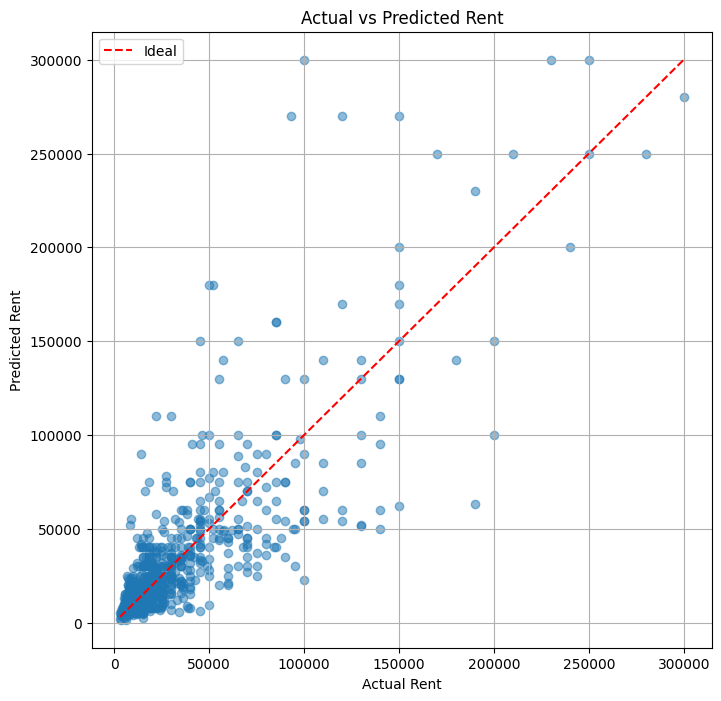


Top 20 feature importances:
                              Feature  Importance
38                       Total_Floors    0.388530
36                                BHK    0.124349
41                           Bathroom    0.113604
42                           log_Size    0.106510
26                        City_Mumbai    0.082312
39                                Day    0.039690
44                       Size_per_BHK    0.022762
45                          Rel_Floor    0.020984
24                     City_Hyderabad    0.011667
23                         City_Delhi    0.011008
29      Furnishing Status_Unfurnished    0.010070
40                              Month    0.009884
37                      Current_Floor    0.008987
25                       City_Kolkata    0.006718
27        Furnishing Status_Furnished    0.006102
34              Area Type_Carpet Area    0.005261
35               Area Type_Super Area    0.005166
32            Tenant Preferred_Family    0.003750
31  Tenant Preferred_

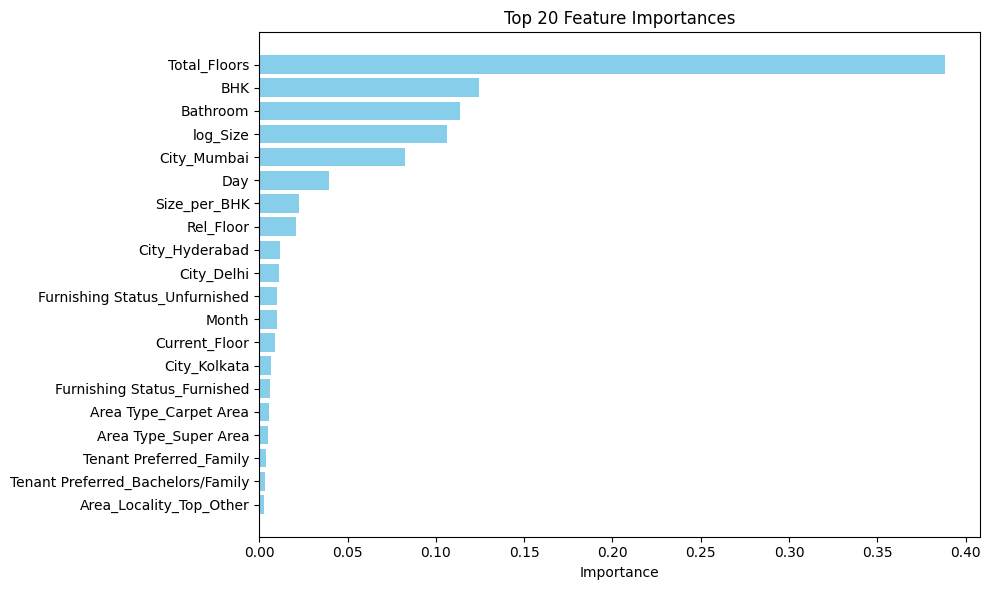


------ RandomForest ------
MSE: 266598954.48
MAE: 8541.14
RMSE: 16327.86
R^2: 0.79


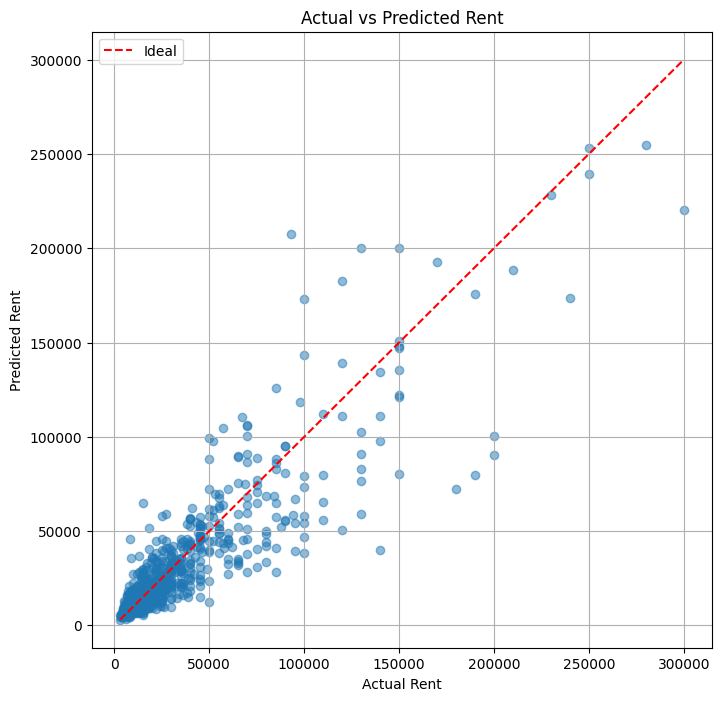


Top 20 feature importances:
                             Feature  Importance
38                      Total_Floors    0.346491
41                          Bathroom    0.119641
36                               BHK    0.117144
42                          log_Size    0.113484
26                       City_Mumbai    0.111709
39                               Day    0.033653
44                      Size_per_BHK    0.027684
45                         Rel_Floor    0.018493
23                        City_Delhi    0.014392
37                     Current_Floor    0.009861
40                             Month    0.009324
29     Furnishing Status_Unfurnished    0.008744
24                    City_Hyderabad    0.007999
35              Area Type_Super Area    0.007531
27       Furnishing Status_Furnished    0.006809
34             Area Type_Carpet Area    0.006051
43                      Bath_per_BHK    0.006048
25                      City_Kolkata    0.006010
28  Furnishing Status_Semi-Furnished    

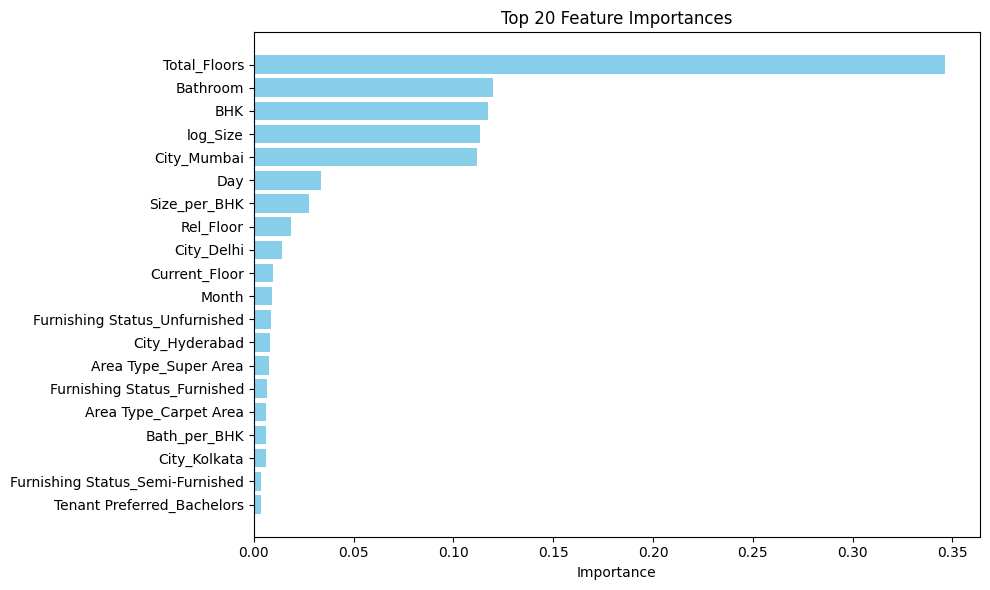


------ XGBoost ------
MSE: 311688864.00
MAE: 9005.94
RMSE: 17654.71
R^2: 0.76


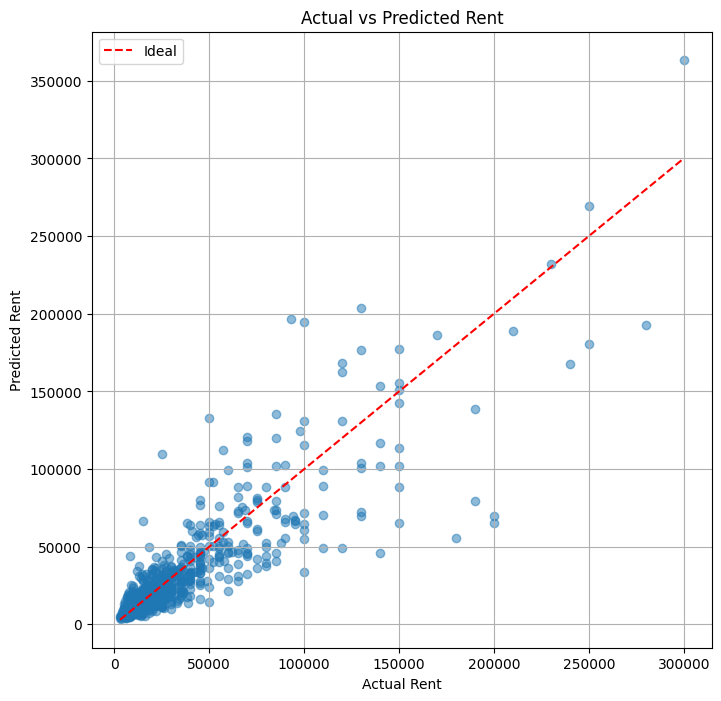


Top 20 feature importances:
                                      Feature  Importance
26                                City_Mumbai    0.230528
36                                        BHK    0.196921
41                                   Bathroom    0.186407
38                               Total_Floors    0.127333
42                                   log_Size    0.027181
23                                 City_Delhi    0.019949
24                             City_Hyderabad    0.019025
34                      Area Type_Carpet Area    0.016575
1               Area_Locality_Top_Bandra West    0.013707
25                               City_Kolkata    0.013569
29              Furnishing Status_Unfurnished    0.012698
16  Area_Locality_Top_Salt Lake City Sector 2    0.009573
14                    Area_Locality_Top_Other    0.009362
27                Furnishing Status_Furnished    0.009193
2       Area_Locality_Top_Banjara Hills, NH 9    0.007891
32                    Tenant Preferred_Fami

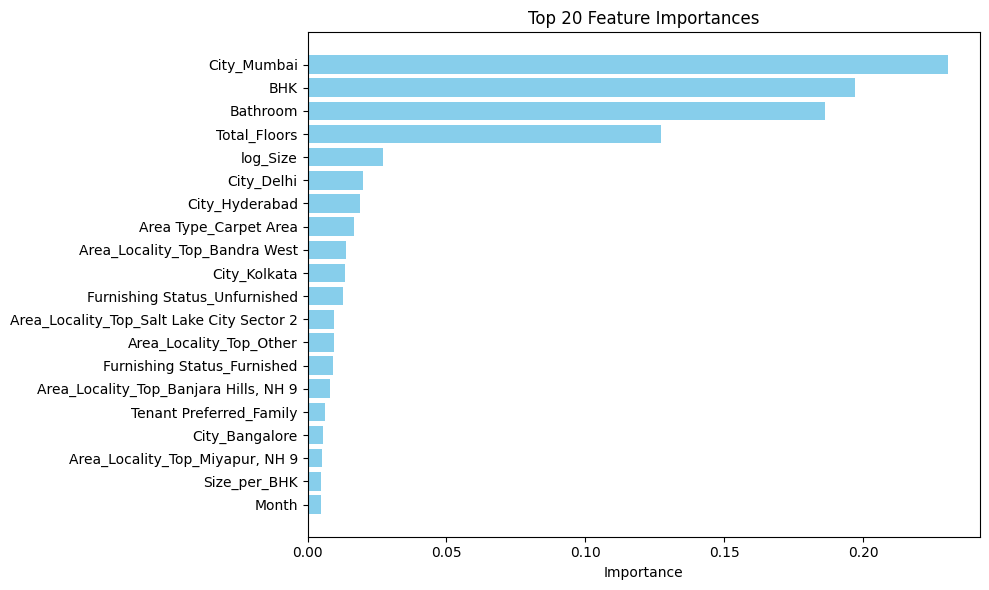

In [61]:
for name, base_model in models.items():
    print(f"\n------ {name} ------")
    pipe = Pipeline([
        ('pre', preprocessor),
        ('model', base_model)
    ])
    model = train_model(pipe, X_train, y_train_log)
    y_true, y_pred = evaluate_model(pipe, X_test, y_test)
    plot_actual_vs_predicted(y_true, y_pred)
    ohe = model.named_steps['pre'].named_transformers_['cat']
    ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
    num_feature_names = [col for col in X_train.columns if col not in categorical_cols]
    all_feature_names = list(ohe_feature_names) + num_feature_names
    plot_feature_importance(model.named_steps['model'], all_feature_names)

Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best RandomForest params: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 300}

RandomForest GridSearchCV:
MSE: 274029724.82
MAE: 8530.67
RMSE: 16553.84
R^2: 0.79


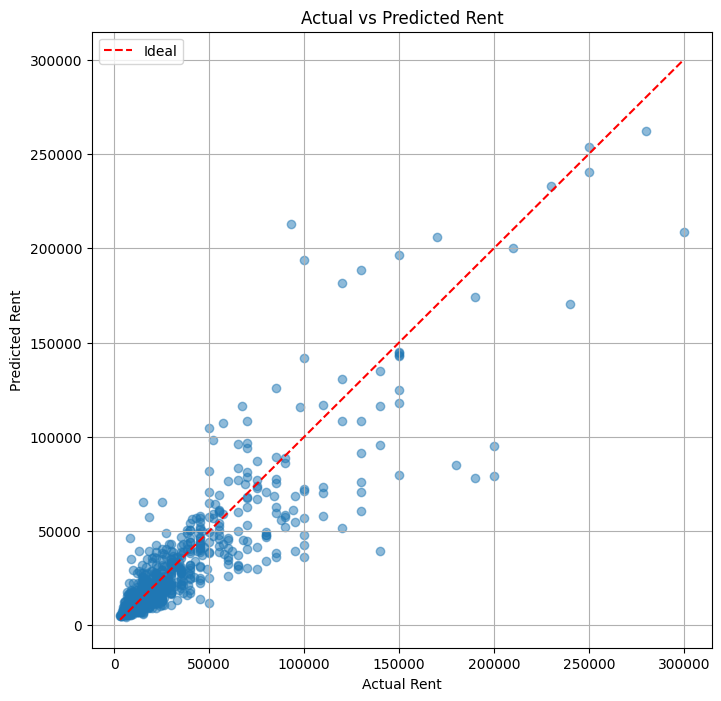

In [62]:
rf_pipe = Pipeline([
    ('pre', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

rf_param_grid = {
    'model__n_estimators': [100, 200,300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 8],
    'model__min_samples_leaf': [1, 2, 5]
}

rf_gs = GridSearchCV(rf_pipe, rf_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
rf_gs.fit(X_train, y_train_log)

print("\nBest RandomForest params:", rf_gs.best_params_)
print("\nRandomForest GridSearchCV:")
y_true, y_pred = evaluate_model(rf_gs.best_estimator_, X_test, y_test)
plot_actual_vs_predicted(y_true, y_pred)

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best XGBoost params: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 300, 'model__subsample': 1.0}

XGBoost GridSearchCV:
MSE: 262358768.00
MAE: 8441.50
RMSE: 16197.49
R^2: 0.80


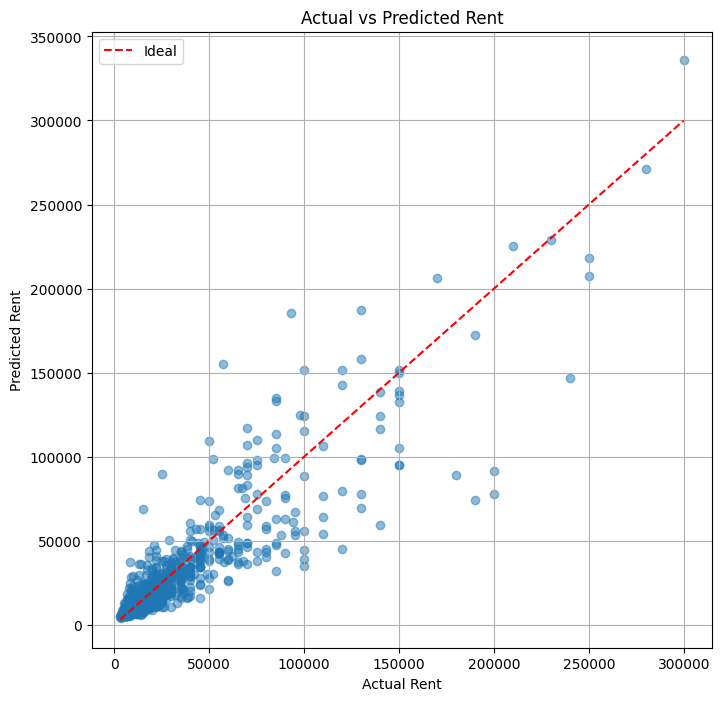

In [63]:
xgb_pipe = Pipeline([
    ('pre', preprocessor),
    ('model', xgb.XGBRegressor(random_state=42, verbosity=0))
])

xgb_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.001,0.01,0.05, 0.1],
    'model__subsample': [0.5,0.8, 1.0],
}

xgb_gs = GridSearchCV(xgb_pipe, xgb_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
xgb_gs.fit(X_train, y_train_log)

print("\nBest XGBoost params:", xgb_gs.best_params_)
print("\nXGBoost GridSearchCV:")
y_true, y_pred = evaluate_model(xgb_gs.best_estimator_, X_test, y_test)
plot_actual_vs_predicted(y_true, y_pred)